In [1]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


The sys module in Python provides various functions and variables that are used to manipulate different parts of the Python runtime environment. It allows operating on the interpreter as it provides access to the variables and functions that interact strongly with the interpreter.

In [2]:
users = pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
books = pd.read_csv('Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# dimension of dataset
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


In [6]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [7]:
draw_missing_data_table(users)

,Total,Percent
Age,110762,0.397199
User-ID,0,0.000000
Location,0,0.000000


Age have around 39% missing values.

## Age Distribution

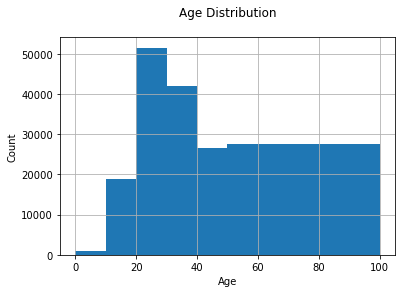

In [8]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are among those in their 20–30s.

Let's check for outliers in age column

Text(0.5, 1.0, 'Find outlier data in Age column')

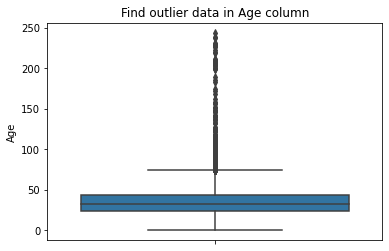

In [9]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

In [10]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Max Age : 244

Ok we have Outlier data in Age

In [11]:
import re
import pandas as pd

# Assuming users is a DataFrame with 'Location' column
# Create a new column 'Country' by extracting country information using regex
users['Country'] = users['Location'].str.extract(r',\s?(\w+\s?\w*)\"*$')

# Replace specific values in 'Country' column
replacement_dict = {
    '': 'other',
    '01776': 'usa',
    '02458': 'usa',
    '19104': 'usa',
    '23232': 'usa',
    '30064': 'usa',
    '85021': 'usa',
    '87510': 'usa',
    'alachua': 'usa',
    'america': 'usa',
    'austria': 'other',
    'autralia': 'australia',
    'cananda': 'canada',
    'geermany': 'germany',
    'italia': 'italy',
    'united kindgonm': 'united kingdom',
    'united sates': 'usa',
    'united staes': 'usa',
    'united state': 'usa',
    'united states': 'usa',
    'us': 'usa'
}
users['Country'] = users['Country'].replace(replacement_dict)

# Drop 'Location' column
users.drop('Location', axis=1, inplace=True)

# Convert 'Country' column to string type
users['Country'] = users['Country'].astype('str')

# Get unique and sorted list of countries
unique_countries = sorted(users['Country'].unique())

print(unique_countries)


['_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'canada eh', 'canda', 'cape may', 'cape town', 'cape verde', 'caribbean sea', 'carter', 'cass', 'catalon

In [12]:
# List of unique countries with various formats
#countries = ['_ brasil', 'a', 'aaa', 'adsgfdr', ...]  # Your list goes here

# Step 1: Standardize Country Names
# Standardized country name mappings
standardized_countries = {
    'aaa': 'other',
    'adsgfdr': 'other',
    'ahrensburg': 'germany',
    'alderney': 'other',
    'algérie': 'algeria',
    'allen': 'usa',
    'andorra': 'andorra',
    'angola': 'angola',
    'aotearoa': 'new zealand',
    'aroostook': 'usa',
    'aruba': 'aruba',
    'asturies': 'spain',
    'auckland': 'new zealand',
    'austbritania': 'other',
    'azerbaijan': 'azerbaijan',
    'baltimore': 'usa',
    'barbados': 'barbados',
    'basilicata': 'italy',
    'bavaria': 'germany',
    'baxter': 'usa',
    'bbbzzzzz': 'other',
    'belarus': 'belarus',
    'belgi': 'belgium',
    'belgique': 'belgium',
    'belize': 'belize',
    'bell': 'other',
    'benin': 'benin',
    'berguedà': 'spain',
    'bernalillo': 'usa',
    'bfe': 'other',
    'bih': 'bosnia and herzegovina',
    'bkk': 'thailand',
    'bladen': 'usa',
    'bolivia': 'bolivia',
    'hernando': 'usa',
    'cameroon': 'cameroon',
    'cherokee': 'usa',
    'clackamas': 'usa',
    'cnina': 'china',
    'davidson': 'usa',
    'dekalb': 'usa',
    'dfg': 'other',
    'diy': 'other',
    'djibouti': 'djibouti',
    'dominica': 'dominica',
    'doodedoo': 'other',
    'dublin': 'ireland',
    'effingham': 'usa',
    'eritrea': 'eritrea',
    'españa': 'spain',
    'essex': 'usa',
    'estonia': 'estonia',
    'ethiopia': 'ethiopia',
    'fairyland': 'other',
    'ferrara': 'italy',
    'fifi': 'other',
    'fiji': 'fiji',
    'finland': 'finland',
    'fontana': 'usa',
    'fortaleza': 'brazil',
    'framingham': 'usa',
    'frome': 'other',
    'galiza': 'spain',
    'georgia': 'georgia',
    'goteborg': 'sweden',
    'granville': 'usa',
    'guyana': 'guyana',
    'guernsey': 'guernsey',
    'haiti': 'haiti',
    'hampden': 'usa',
    'harvatija': 'other',
    'hennipen': 'usa',
    'hernando': 'usa',
    'hillsborough': 'usa',
    'holland': 'netherlands',
    'hongkong': 'hong kong',
    'indiai': 'india',
    'kern': 'usa',
    'kiribati': 'kiribati',
    'kyrgyzstanlkjlj': 'kyrgyzstan',
    'lleida': 'spain',
    'lornsenland': 'other',
    'macau': 'macau',
    'malawi': 'malawi',
    'maracopa': 'usa',
    'marrion': 'usa',
    'mauritania': 'mauritania',
    'mozambique': 'mozambique',
    'moçambique': 'mozambique',
    'mérida': 'mexico',
    'nicaragua': 'nicaragua',
    'none': 'other',
    'nowhere': 'other',
    'nrw': 'germany',
    'nyc': 'usa',
    'nyhamnsly': 'sweden',
    'pinallas': 'usa',
    'pistlavakia': 'other',
    'pasco': 'usa',
    'pender': 'usa',
    'peru': 'peru',
    'perãº': 'peru',
    'phila': 'usa',
    'philippine': 'philippines',
    'phils': 'philippines',
    'quit': 'other',
    'rapides': 'usa',
    'rmi': 'other',
    'rosario': 'argentina',
    'rosello': 'other',
    'rutherford': 'usa',
    'solano': 'usa',
    'sardegna': 'italy',
    'sardinia': 'italy',
    'senegal': 'senegal',
    'spotsylvania': 'usa',
    'strongbadia': 'other',
    'suisse': 'switzerland',
    'suriname': 'suriname',
    'swaz':'switzerland'
}

# Cleaned list to store the final country names
cleaned_countries = []

# Step 2: Clean and Standardize
for country in unique_countries:
    country = country.strip()  # Remove leading/trailing spaces
    country = country.lower()  # Convert to lowercase
    if country in standardized_countries:
        cleaned_countries.append(standardized_countries[country])
    elif country.isalpha() and len(country) > 2:  # Ignore short and non-alphabetic entries
        cleaned_countries.append(country)

# Step 3: Sort and Remove Duplicates
cleaned_countries = sorted(set(cleaned_countries))

# Print the cleaned and sorted list of countries
print(cleaned_countries)

['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antarctica', 'argentina', 'armenia', 'aruba', 'australia', 'australii', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bermuda', 'bhutan', 'bolivia', 'bosnia', 'bosnia and herzegovina', 'botswana', 'brasil', 'brazil', 'brunei', 'bucks', 'bulgaria', 'buncombe', 'burkinafasu', 'burlington', 'burma', 'butler', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'canada', 'canda', 'carter', 'cass', 'catalonia', 'catalunya', 'chad', 'chian', 'chile', 'china', 'clinton', 'collin', 'colombia', 'comoros', 'congo', 'cook', 'copenhagen', 'country', 'courtenay', 'croatia', 'csa', 'cuba', 'cyprus', 'dauphin', 'denmark', 'der', 'deutschland', 'djibouti', 'dominica', 'ecuador', 'egypt', 'england', 'english', 'eritrea', 'estonia', 'ethiopia', 'europa', 'europe', 'euskadi', 'fiji', 'finland', 'france', 'fred', 'fulton', 'gabon', 'georgia', 'germany', 'germay', 'ghana', 'g

Text(0.5, 1.0, 'Count of users Country wise')

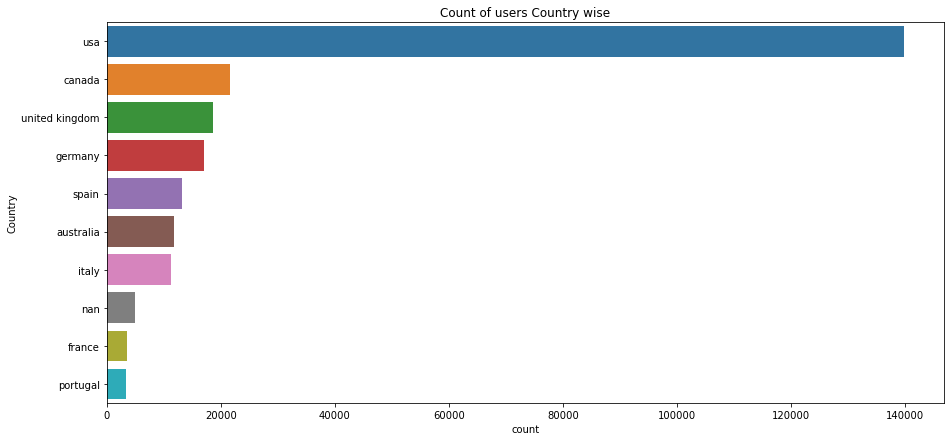

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

Most number of users are from USA

Let's treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

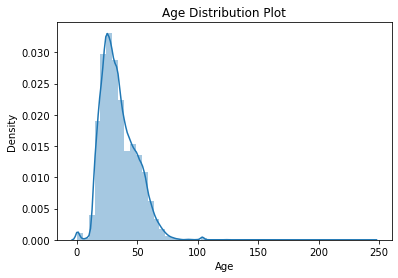

In [14]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

In [15]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [16]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [17]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [18]:
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

Still we have 276 Nan values let's fill them with mean

In [19]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [20]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

## Books_Dataset

In [21]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [22]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Authors')

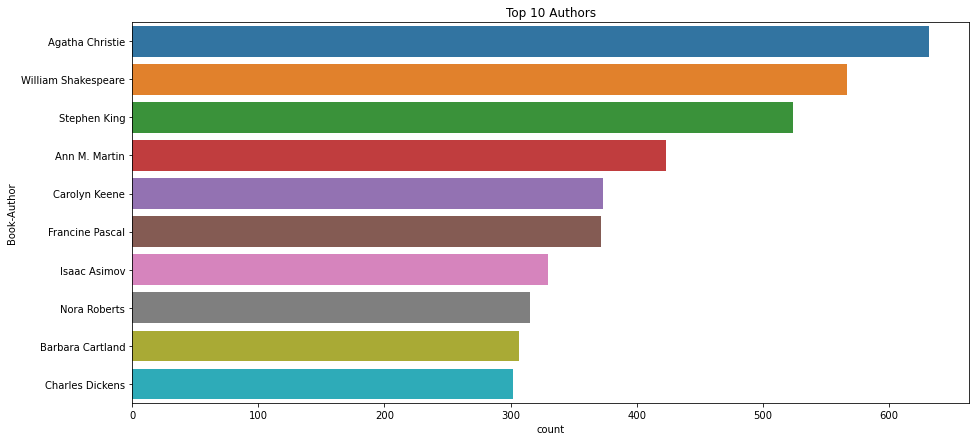

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

Top 10 Publisher which have published the most books.

Text(0.5, 1.0, 'Top 10 Publishers')

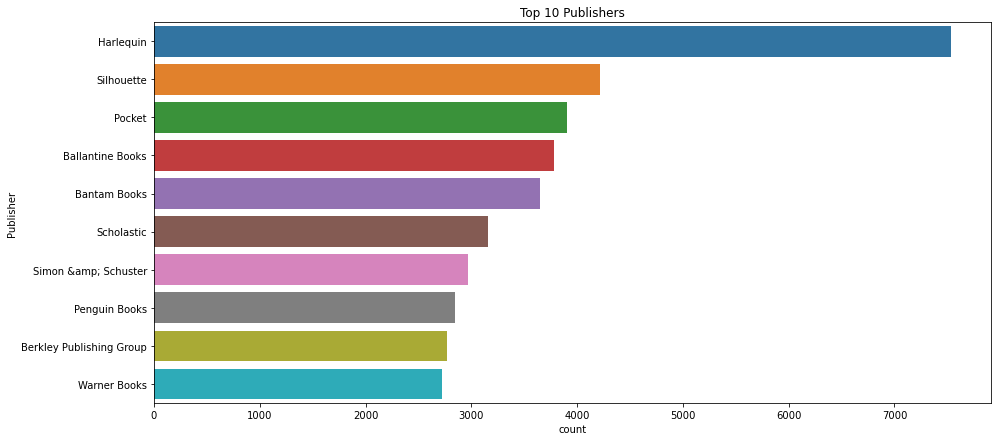

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [25]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [26]:
books[books['Year-Of-Publication']== '0']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
196656,3442035368,Ich Gestehe,Heinz G. Konsalik,0,Wilhelm Goldmann Verlag GmbH,http://images.amazon.com/images/P/3442035368.0...,http://images.amazon.com/images/P/3442035368.0...,http://images.amazon.com/images/P/3442035368.0...
196678,0553124803,Being There,Jerzy Kosinski,0,Bantam Doubleday Dell,http://images.amazon.com/images/P/0553124803.0...,http://images.amazon.com/images/P/0553124803.0...,http://images.amazon.com/images/P/0553124803.0...
196680,888274387X,Vaniglia E Cioccolato,Modignani Casati,0,Sperling Paperback,http://images.amazon.com/images/P/888274387X.0...,http://images.amazon.com/images/P/888274387X.0...,http://images.amazon.com/images/P/888274387X.0...
196685,033368155X,Surreal Lives the Surrealists 1945,Ruth Brandon,0,Humanity Press/prometheus Bk,http://images.amazon.com/images/P/033368155X.0...,http://images.amazon.com/images/P/033368155X.0...,http://images.amazon.com/images/P/033368155X.0...
196734,0207158452,Games of the Strong,Glenda Adams,0,Harpercollins Publisher,http://images.amazon.com/images/P/0207158452.0...,http://images.amazon.com/images/P/0207158452.0...,http://images.amazon.com/images/P/0207158452.0...
...,...,...,...,...,...,...,...,...
261929,0760700702,100 Great Archaeological Discoveries,Paul G Bahn,0,Barnes Noble Inc,http://images.amazon.com/images/P/0760700702.0...,http://images.amazon.com/images/P/0760700702.0...,http://images.amazon.com/images/P/0760700702.0...
261930,0760701962,UFO's: A Scientific Debate,Carl Sagan,0,Barnes Noble Books,http://images.amazon.com/images/P/0760701962.0...,http://images.amazon.com/images/P/0760701962.0...,http://images.amazon.com/images/P/0760701962.0...
261931,0760706379,Only Way to Cross,John Maxtone Graham,0,Barnes Noble,http://images.amazon.com/images/P/0760706379.0...,http://images.amazon.com/images/P/0760706379.0...,http://images.amazon.com/images/P/0760706379.0...
262120,0880292288,New York Times Guide to Reference Materials,Mona Mccormick,0,Dorset House Publishing Co Inc,http://images.amazon.com/images/P/0880292288.0...,http://images.amazon.com/images/P/0880292288.0...,http://images.amazon.com/images/P/0880292288.0...


In [27]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books[books['Year-Of-Publication']== 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [28]:
#making required corrections as above, keeping other fields intact

books.loc[books.ISBN == '078946697X','Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','Image-URL-M'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','Image-URL-S'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '078946697X','Publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = '2000'
books.loc[books.ISBN == '078946697X','Book-Author'] = 'Unknown'
books.loc[books.ISBN == '078946697X','Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [29]:
#making required corrections as above, keeping other fields intact

books.loc[books.ISBN == '0789466953','Image-URL-L'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','Image-URL-M'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','Image-URL-S'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '0789466953','Publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = '2000'
books.loc[books.ISBN == '0789466953','Book-Author'] = 'Unknown'
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [30]:
#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Unknown,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",Unknown,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [31]:
#investigating the rows having 'Gallimard' as yearOfPublication
books[books['Year-Of-Publication']== 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [32]:
#making required corrections as above, keeping other fields intact

books.loc[books.ISBN == '2070426769','Image-URL-L'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','Image-URL-M'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','Image-URL-S'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '2070426769','Publisher'] = 'Gallimard'
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = '2003'
books.loc[books.ISBN == '2070426769','Book-Author'] = 'Unknown'
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [33]:
# rechecking 
books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Unknown,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...


In [34]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

In [35]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [36]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [37]:
draw_missing_data_table(books)

,Total,Percent
Publisher,2,0.000007
Book-Author,1,0.000004
ISBN,0,0.000000
Book-Title,0,0.000000
Year-Of-Publication,0,0.000000


In [38]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [39]:
#Filling Nan of Publisher with Unknown
books.Publisher.fillna('Unknown',inplace=True)

In [40]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [41]:
#Filling Nan of Book-Author with Unknown
books['Book-Author'].fillna('Unknown',inplace=True)

In [42]:
draw_missing_data_table(books)

,Total,Percent
ISBN,0,0.0
Book-Title,0,0.0
Book-Author,0,0.0
Year-Of-Publication,0,0.0
Publisher,0,0.0


## Ratings_Dataset

In [43]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Ratings dataset should have books only which exist in our books dataset

In [44]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.

In [45]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

Let's see how the ratings are distributed

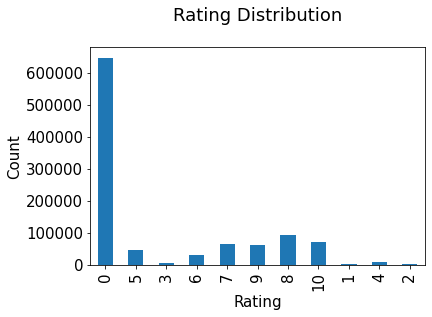

In [46]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [47]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [48]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

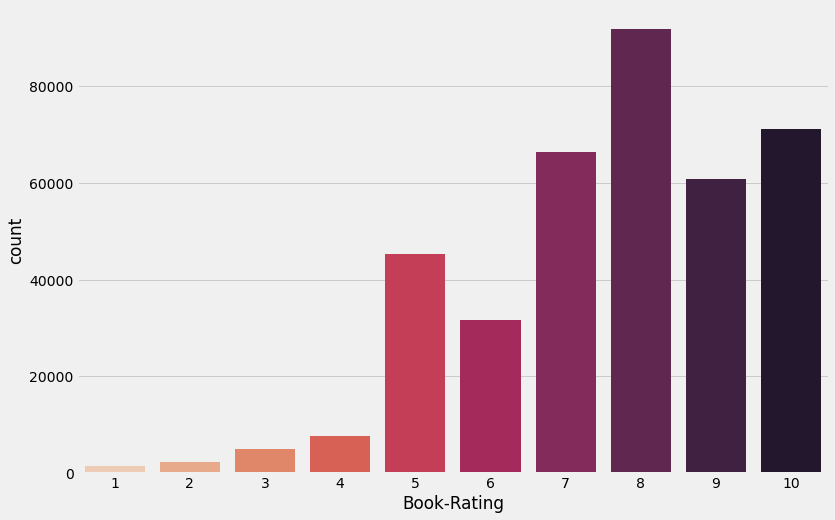

In [49]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

Let's find the top 5 books which are rated by most number of users.

In [50]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [51]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [52]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [53]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


### Merging All Dataset.

In [54]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [55]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,31.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,31.0,nan,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [56]:
draw_missing_data_table(Final_Dataset)

,Total,Percent
User-ID,0,0.0
Age,0,0.0
Country,0,0.0
ISBN,0,0.0
Book-Rating,0,0.0
Avg_Rating,0,0.0
Total_No_Of_Users_Rated,0,0.0
Book-Title,0,0.0
Book-Author,0,0.0
Year-Of-Publication,0,0.0


In [57]:
Final_Dataset.shape

(383842, 11)

## Popularity Based Filtering

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend

right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that

book to the user who just signed up.


Book weighted avg formula:

Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]


where,

v is the number of votes for the books;
m is the minimum votes required to be listed in the chart;
R is the average rating of the book; and
C is the mean vote across the whole report.


Now we find the values of v,m,R,C.

In [58]:
# Calculate mean average rating (C) and the quantile (m)
C = Final_Dataset['Avg_Rating'].mean()
m = Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)

# Filter books with enough ratings
Top_Books = Final_Dataset[Final_Dataset['Total_No_Of_Users_Rated'] >= m]

# Define the weighted_rating function
def weighted_rating(x):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

# Calculate scores and sort by score
Top_Books['Score'] = Top_Books.apply(weighted_rating, axis=1)
Top_Books = Top_Books.sort_values('Score', ascending=False)

# Display results
print(f'C = {C}, m = {m}')
print("Shape of Top_Books dataset:", Top_Books.shape)
Top_Books.head()


C = 7.626700569504765, m = 64.0
Shape of Top_Books dataset: (38570, 12)


,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Score
5954,171011,13.0,usa,0439139597,10,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,8.741835
5973,201783,25.0,usa,0439139597,9,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,8.741835
5967,189557,26.0,venezuela,0439139597,10,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,8.741835
5968,190448,39.0,usa,0439139597,8,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,8.741835
5969,193499,41.0,usa,0439139597,8,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,8.741835


In [59]:
# Keep only one entry of each book
Top_Books = Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()

# Create a color map
cm = sns.light_palette('yellow', as_cmap=True)

# Sort books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

# Print the top 20 books
top_books_subset = Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20)
top_books_subset.style.background_gradient(cmap=cm)


,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

## Recommender System Using Model-Based Collaborative Filtering

The primary objective of the recommender system is to forecast user preferences for a selection of items based on their previous interactions. Among the most widely used techniques, Content-Based and Collaborative Filtering stand out.

Collaborative filtering serves as a cornerstone for platforms like Amazon, YouTube, and Netflix. It functions by identifying items that a user might find appealing, grounded in the behavior of similar users. Collaborative filtering algorithms can be categorized into two types: memory-based and model-based.

The model-based approach involves constructing machine learning algorithms to anticipate user ratings. These algorithms utilize dimensionality reduction techniques to transform a high-dimensional matrix, which contains numerous missing values, into a smaller matrix within a lower-dimensional space.

This section aims to compare the SVD and NMF algorithms, experiment with various parameter configurations, and delve into the outcomes achieved.

In [60]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

The forthcoming analysis will center around book recommendations derived from the Book-Crossing dataset. To tackle potential memory errors and streamline the dataset, the focus will be directed toward users who have provided a minimum of three ratings, as well as the top 10% of the most frequently rated books.

The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [61]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [62]:
# Set the user ratings threshold
user_ratings_threshold = 3

# Filter users based on the threshold
filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

# Filter ratings based on active users
df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

# Print information about the filtering
print(f"Filter: users with at least {user_ratings_threshold} ratings")
print(f"Number of records: {len(df_ratings_top)}")


Filter: users with at least 3 ratings
Number of records: 327271


In [63]:
# Set the book ratings threshold percentage
book_ratings_threshold_perc = 0.1

# Calculate the book ratings threshold
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

# Filter books based on the threshold
filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()

# Filter ratings based on top rated books
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

# Print information about the filtering
print(f"Filter: top {book_ratings_threshold_perc*100}% most frequently rated books")
print(f"Number of records: {len(df_ratings_top)}")

Filter: top 10.0% most frequently rated books
Number of records: 160787


SVD and NMF models comparison

Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

In [64]:
#Installing Surprise package 
#pip install surprise

In [65]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [66]:
# Create a copy of the filtered DataFrame
df = df_ratings_top.copy()

# Create a Reader with the specified rating scale
reader = Reader(rating_scale=(1, 10))

# Load data from the DataFrame using the Reader
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [67]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.601297
test_mae     1.239336
fit_time     5.926828
test_time    0.403249
dtype: float64

In [68]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.615224
test_mae     2.234347
fit_time     8.411870
test_time    0.448134
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

## Optimisation of SVD

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

This process is designed to determine the optimal parameter settings for improving the performance of the recommender system using the Surprise package. The parameters under consideration are as follows:

n_factors: The number of latent factors utilized in the matrix factorization-based models. These factors capture underlying patterns in the user-item interaction data.

n_epochs: The number of iterations in the Stochastic Gradient Descent (SGD) procedure. SGD is used to iteratively update the model's parameters to minimize the prediction error.

lr_all: The learning rate that controls the step size in each iteration of the SGD process. It affects the convergence speed of the model.

reg_all: The regularization term added to the objective function. It helps prevent overfitting by penalizing complex models.

The grid search method systematically evaluates various combinations of these parameters to identify the configuration that yields the best performance according to the chosen evaluation metrics, which are typically RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). The process helps fine-tune the model for optimal results, though the improvements achieved might be relatively minor. The main goal is to balance model complexity and generalization to unseen data.

In [69]:
param_grid = {'n_factors': [80, 100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5938011333438906
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


## Analysis of Collaborative Filtering model results

In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [70]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [71]:
# Create a DataFrame to store the prediction results
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])

# Extract the 'was_impossible' value from the 'details' column to determine if the prediction was possible
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])

# Round the predicted ratings to the nearest integer
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()

# Calculate the absolute error between predicted and actual ratings
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])

# Drop the 'details' column as it is no longer needed
df_pred.drop(['details'], axis=1, inplace=True)

# Display a random sample of 5 rows from the prediction results DataFrame
df_pred.sample(5)


,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
13365,246759,0140186409,4.0,6.611553,False,7.0,2.611553
30462,132188,0671868713,8.0,7.684140,False,8.0,0.315860
19731,48357,0802130208,8.0,7.009278,False,7.0,0.990722
28818,58389,0060915544,9.0,8.500777,False,9.0,0.499223
12787,87051,0345460359,8.0,8.144733,False,8.0,0.144733


Analysis of the actual and predicted ratings distribution in the test set reveals interesting insights. When considering the distribution of actual ratings given to books in the test set, a significant portion of users tend to provide positive scores, primarily falling within the range of 7 to 10. The mode of this distribution aligns closely with a rating of 8, but notable counts are also observed for ratings 7, 9, and 10. 

In contrast, the distribution of predicted ratings in the test set exhibits noticeable differences. While the mode remains at 8, the occurrence of ratings 7, 9, and 10 is relatively less frequent compared to the actual distribution. This discrepancy suggests a variance between user expectations and the model's predictions.

It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

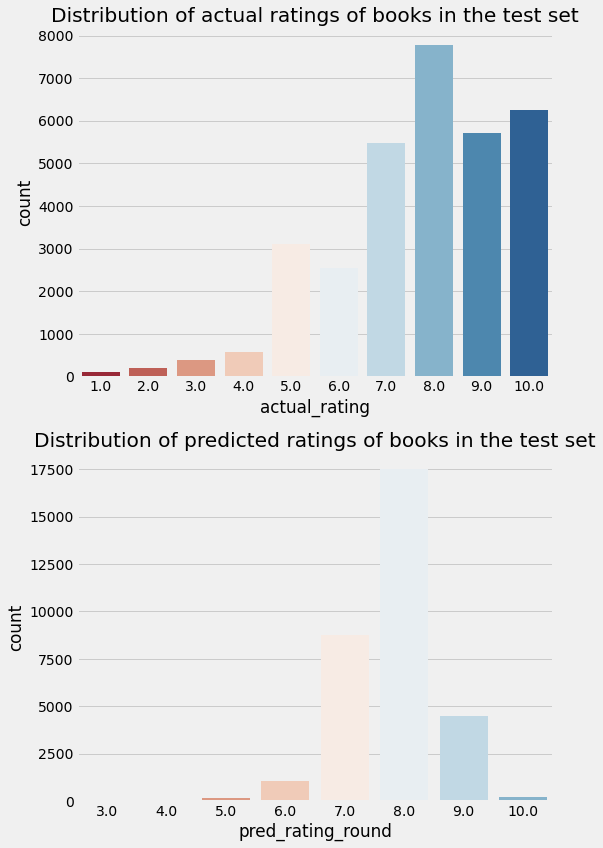

In [72]:
# Set the color palette
palette = sns.color_palette("RdBu", 10)

# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot the distribution of actual ratings in the test set
sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')  # Set title for the first subplot

# Plot the distribution of predicted ratings in the test set
sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')  # Set title for the second subplot

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

 Absolute error of predicted ratings
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.

How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

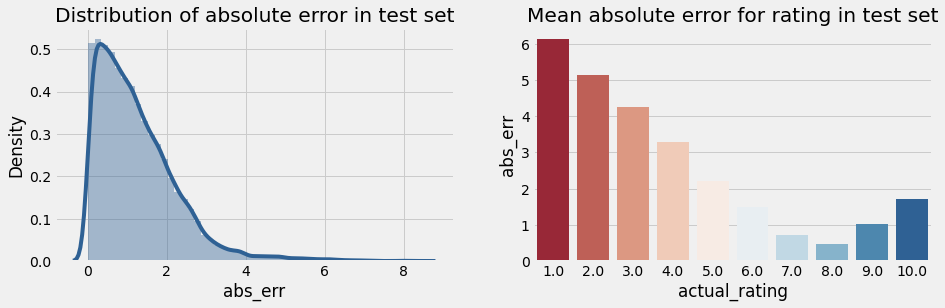

In [73]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

Analysis of predicted ratings of a particular user

For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [74]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

#### Train set: Top rated books

In [75]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113587,193458,0142001740,9,8.452769,307,The Secret Life of Bees,NaN
113577,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,NaN
113615,193458,0553258001,9,8.236842,38,The Cider House Rules,NaN
113594,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,NaN
113620,193458,0679429220,9,7.794393,107,Midnight in the Garden of Good and Evil: A Sav...,NaN
113584,193458,0140298479,9,7.539823,113,Bridget Jones: The Edge of Reason,NaN
113576,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",NaN
113582,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),NaN
113583,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN
113585,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),NaN


#### Test set: predicted top rated books

In [76]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113580,193458,006447108X,9,8.833333,18,The Last Battle,8.330308
113619,193458,0671880314,9,8.305556,36,Schindler's List,8.164424
113599,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),8.044747
113579,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),8.034312
113593,193458,0345342569,9,7.947368,19,Shoeless Joe,7.930595


#### Test set: actual top rated books

In [77]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113579,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),8.034312
113580,193458,006447108X,9,8.833333,18,The Last Battle,8.330308
113592,193458,0330352695,9,7.615385,13,Four Letters of Love,7.631032
113593,193458,0345342569,9,7.947368,19,Shoeless Joe,7.930595
113599,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),8.044747


## Collaborative Filtering based Recommendation System--(Item-Item Based)

In [78]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [79]:
df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


In [80]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [81]:
df_ratings_top.head()

,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


## Implementing KNN

In [82]:
# Generating ratings matrix from explicit ratings table
# This matrix will have users as rows and books as columns, with ratings as values
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')

# Get the list of user IDs and book ISBNs
user_ids = ratings_matrix.index
book_isbns = ratings_matrix.columns

# Print the shape of the ratings matrix
print("Shape of the ratings matrix:", ratings_matrix.shape)

# Display the head of the ratings matrix to show the structure
ratings_matrix.head()

# Notice that most of the values are NaN (undefined), implying absence of ratings for those entries


Shape of the ratings matrix: (18549, 13740)


ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [84]:
#checking first few rows
ratings_matrix.head()

ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
n_books = ratings_matrix.shape[1]
sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [86]:
# Combine ratings and books dataframes based on ISBN
combine_book_rating = pd.merge(ratings, books, on='ISBN')

# List of columns to drop from the combined dataframe
columns_to_drop = ['Book-Author', 'Year-Of-Publication', 'Publisher']

# Drop the specified columns from the combined dataframe
combine_book_rating = combine_book_rating.drop(columns_to_drop, axis=1)

# Rename columns to standardize the column names
combine_book_rating.rename(columns={'User-ID': 'user_id', 'Book-Title': 'book_title', 'Book-Rating': 'book_rating'}, inplace=True)

# Display the head of the combined and processed dataframe
combine_book_rating.head()


,user_id,ISBN,book_rating,book_title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [87]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['book_title'])

In [88]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['book_title',])['book_rating'].
                    count().
                    reset_index().
                    rename(columns = {'book_rating':'TotalRatingCount'})
                    [['book_title','TotalRatingCount']])

In [89]:
book_ratingcount.head()

,book_title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books

In [90]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'book_title', right_on = 'book_title', how = 'inner' )


In [91]:
rating_with_totalratingcount.head()

,user_id,ISBN,book_rating,book_title,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [92]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


The median book has been rated only once. Let’s look at the top of the distribution:

In [93]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.

In [94]:
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [95]:
rating_popular_book.head()

,user_id,ISBN,book_rating,book_title,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [96]:
# Check for and remove duplicate rows based on userID and bookTitle columns in the rating_popular_book dataframe.

if not rating_popular_book[rating_popular_book.duplicated(['user_id', 'book_title'])].empty:
    # Get the initial number of rows in the dataframe
    initial_rows = rating_popular_book.shape[0]

    # Display the initial shape of the dataframe
    print('Initial dataframe shape: {0}'.format(rating_popular_book.shape))
    
    # Remove duplicates based on the 'userID' and 'bookTitle' columns
    rating_popular_book = rating_popular_book.drop_duplicates(['user_id', 'book_title'])
    
    # Get the current number of rows in the dataframe after removing duplicates
    current_rows = rating_popular_book.shape[0]
    
    # Display the new shape of the dataframe after removing duplicates
    print('New dataframe shape: {0}'.format(rating_popular_book.shape))
    
    # Calculate and display the number of removed rows
    removed_rows_count = initial_rows - current_rows
    print('Removed {0} rows'.format(removed_rows_count))


Initial dataframe shape: (288740, 5)
New dataframe shape: (285518, 5)
Removed 3222 rows


In [97]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'book_title',columns = 'user_id', values = 'book_rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

Finding the Nearest Neighbors

In [98]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Test our model and Make few Recommnedations

In [99]:
# Select a random user for whom recommendations will be generated
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])

# Find the nearest neighbors of the selected user using the k-nearest neighbors model
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors=6)

# Loop through the recommendations and display them for the selected user
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        # Print the recommendation index, book title, and the distance from the selected user
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Blood Shot (V.I. Warshawski Novels (Paperback)):

1: Burn Marks (V.I. Warshawski Novels (Paperback)), with distance of 0.7449640234640962:
2: Praying for Sleep, with distance of 0.8352485909414594:
3: Touching Evil, with distance of 0.8501002682966168:
4: Speaking in Tongues, with distance of 0.8577468901610653:
5: A Perfect Stranger, with distance of 0.8809047714247638:


In [100]:
# Create a pivot table where rows represent users, columns represent book titles,
# and values represent the book ratings. Fill missing values with 0.
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index='user_id', columns='book_title', values='book_rating').fillna(0)


In [101]:
us_canada_user_rating_pivot2.head()

book_title,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
user_id,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [102]:
us_canada_user_rating_pivot2.shape

(47994, 2444)

In [103]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

In [104]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [105]:
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

In [106]:
# Get the list of book titles in the US-Canada user rating pivot table
us_canada_book_title = us_canada_user_rating_pivot2.columns

# Convert the book titles list to a Python list
us_canada_book_list = list(us_canada_book_title)

# Find the index of the target book "Harry Potter and the Sorcerer's Stone (Book 1)"
target_book_index = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

# Get the correlation of the target book with other books
corr_target_book = corr[target_book_index]

# Create a boolean mask to filter out similar books with high correlation
similar_books_mask = (corr_target_book < 1.0) & (corr_target_book > 0.9)

# Get the indices of similar books based on the mask
similar_books_indices = [i for i, is_similar in enumerate(similar_books_mask) if is_similar]

# Get the book titles of similar books
similar_book_titles = us_canada_book_title[similar_books_indices]

# Create a DataFrame to store information about similar books
similar_books_df = pd.DataFrame({
    'Book_Title': similar_book_titles,
    'Correlation': corr_target_book[similar_books_indices]
})

# Display the DataFrame of similar books
similar_books_df


,Book_Title,Correlation
0,Harry Potter and the Chamber of Secrets (Book 2),0.975
1,Harry Potter and the Goblet of Fire (Book 4),0.970
2,Harry Potter and the Order of the Phoenix (Boo...,0.949
3,Harry Potter and the Prisoner of Azkaban (Book 3),0.982
4,Harry Potter and the Sorcerer's Stone (Book 1),1.000


## Collaborative Filtering based Recommendation System--(User-Item based)

In [107]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [108]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


In [109]:
# Count the number of interactions (ratings) for each user and group them by user and ISBN
interactions_per_user_book = ratings_explicit.groupby(['User-ID', 'ISBN']).size()

# Count the number of users with interactions
users_with_interactions_count = interactions_per_user_book.groupby('User-ID').size()

# Print the total number of unique users
print('Total number of users: %d' % len(users_with_interactions_count))

# Select users with a minimum number of interactions (ratings)
users_with_enough_interactions_df = users_with_interactions_count[users_with_interactions_count >= 100].reset_index()[['User-ID']]

# Print the number of users with a minimum number of interactions
print('Number of users with at least 100 interactions: %d' % len(users_with_enough_interactions_df))


Total number of users: 68091
Number of users with at least 100 interactions: 449


In [110]:
# Print the total number of interactions (ratings) in the explicit ratings dataset
print('Total number of interactions: %d' % len(ratings_explicit))

# Merge the explicit ratings dataset with the list of users who have enough interactions
# This will retain only interactions from users with at least 100 interactions
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how='right',
               left_on='User-ID',
               right_on='User-ID')

# Print the number of interactions from users with at least 100 interactions
print('Number of interactions from users with at least 100 interactions: %d' % len(interactions_from_selected_users_df))


Total number of interactions: 383842
Number of interactions from users with at least 100 interactions: 103271


In [111]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000,1
1,2033,0060248025,10,8.767,30
2,2033,0060256664,10,8.333,6
3,2033,0060256737,10,9.045,22
4,2033,0060950536,10,9.400,5
5,2033,0061020419,7,7.000,1
6,2033,0061020427,6,6.000,1
7,2033,0061056278,10,9.000,2
8,2033,0061056286,8,7.667,3
9,2033,0061056294,9,7.000,2


In [112]:
import math

# Define a function to apply a smoothing transformation to user preferences
def smooth_user_preference(x):
    return math.log(1 + x, 2)

# Group the interactions from selected users by ISBN and User-ID, then apply the smoothing transformation
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()

# Print the number of unique user/item interactions after applying the smoothing transformation
print('Number of unique user/item interactions: %d' % len(interactions_full_df))

# Display the first few rows of the interactions_full_df DataFrame
interactions_full_df.head()


Number of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


In [113]:
from sklearn.model_selection import train_test_split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

In [114]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
87596,0879051213,95010,3.000
52630,0515101230,129074,3.000
68434,0679427724,75819,3.170
85835,0843951346,135149,3.322
92752,1551665727,158295,3.170


In [115]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,0001935968,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [116]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [118]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

# Define the number of factors for matrix factorization
NUMBER_OF_FACTORS_MF = 15

# Perform matrix factorization of the original user-item matrix
# U: User matrix, sigma: Diagonal matrix of singular values, Vt: Item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k=NUMBER_OF_FACTORS_MF)

# Print the shape of the original user-item matrix
print('Shape of users_items_pivot_matrix:', users_items_pivot_matrix.shape)

# Print the shape of the user matrix (U)
print('Shape of User matrix (U):', U.shape)

# Create a diagonal matrix using the singular values (sigma)
sigma = np.diag(sigma)

# Print the shape of the diagonal matrix of singular values (sigma)
print('Shape of Diagonal matrix of singular values (sigma):', sigma.shape)

# Print the shape of the item matrix (Vt)
print('Shape of Item matrix (Vt):', Vt.shape)


Shape of users_items_pivot_matrix: (449, 55734)
Shape of User matrix (U): (449, 15)
Shape of Diagonal matrix of singular values (sigma): (15, 15)
Shape of Item matrix (Vt): (15, 55734)


After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [119]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 4.88550541e-03,  2.85971611e-03,  3.38388681e-03, ...,
         1.42013223e-04,  3.54079515e-04,  7.47768905e-03],
       [-7.18981417e-04, -8.50242379e-04, -1.00608727e-03, ...,
         9.56415201e-05,  1.97131524e-04,  4.70357968e-03],
       [ 4.20625317e-03, -1.63794830e-03, -1.93817548e-03, ...,
         1.47160380e-04,  3.15909212e-04,  6.62829028e-03],
       ...,
       [ 4.21283796e-03,  1.86101942e-03,  2.20213435e-03, ...,
         2.48492914e-04,  4.61193093e-04,  7.80653269e-03],
       [ 1.14220835e-02, -2.09370075e-03, -2.47746493e-03, ...,
         3.32924986e-04,  6.47171181e-04,  1.17120919e-02],
       [-1.45777630e-03,  5.15857348e-03,  6.10411246e-03, ...,
         8.40473244e-05,  1.43564965e-04,  2.90875718e-03]])

In [120]:
all_user_predicted_ratings.shape

(449, 55734)

In [121]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.005,-0.001,0.004,0.003,-0.002,-0.004,-0.003,-0.002,0.012,0.012,...,0.000,0.003,-0.002,0.007,-0.012,0.001,0.007,0.004,0.011,-0.001
000104687X,0.003,-0.001,-0.002,0.017,-0.001,0.008,0.017,0.007,-0.003,0.012,...,-0.002,0.013,-0.001,0.020,-0.005,-0.006,0.015,0.002,-0.002,0.005
0001047973,0.003,-0.001,-0.002,0.020,-0.001,0.009,0.020,0.009,-0.003,0.014,...,-0.003,0.016,-0.001,0.024,-0.006,-0.007,0.018,0.002,-0.002,0.006
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.003,0.002,0.004,...,0.001,0.002,0.003,0.001,0.002,0.002,0.002,0.001,0.001,0.000
0001048082,0.003,-0.001,-0.002,0.020,-0.001,0.009,0.019,0.008,-0.003,0.013,...,-0.003,0.015,-0.001,0.023,-0.006,-0.007,0.017,0.002,-0.002,0.006


In [122]:
len(cf_preds_df.columns)

449

In [123]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.000,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.000,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.000,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.000,W. W. Norton &amp; Company


In [124]:
class CFRecommender:
    
    # Class-level constant for the model name
    MODEL_NAME = 'Collaborative Filtering'
    
    # Constructor to initialize the class
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df  # Store the collaborative filtering predictions DataFrame
        
    # Method to get the model name
    def get_model_name(self):
        return self.MODEL_NAME
        
    # Method to recommend items for a user
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending=False).head(topn)
        
        # Merge with the 'books' DataFrame to get book details
        recommendations_df = recommendations_df.merge(books, on='ISBN', how='inner')
        recommendations_df = recommendations_df[['ISBN', 'Book-Title', 'recStrength']]

        return recommendations_df

# Create an instance of the CFRecommender class using cf_preds_df
cf_recommender_model = CFRecommender(cf_preds_df)


In [125]:
# Indexing the interactions_full_df DataFrame by 'User-ID' to enhance search performance
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')

# Indexing the interactions_train_df DataFrame by 'User-ID' to enhance search performance
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')

# Indexing the interactions_test_df DataFrame by 'User-ID' to enhance search performance
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [126]:
def get_items_interacted(UserID, interactions_df):
    # Locate the row corresponding to the given UserID in the interactions DataFrame
    user_interactions = interactions_df.loc[UserID]

    # Retrieve the 'ISBN' column from the user's interactions
    interacted_items = user_interactions['ISBN']

    # Convert the interacted_items to a set if it's a Series (multiple interactions), else convert it to a list
    interacted_items_set = set(interacted_items if isinstance(interacted_items, pd.Series) else [interacted_items])

    return interacted_items_set

In [127]:
class ModelRecommender:
    
    # Function to get a sample of items that a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        # Get items that the user has interacted with
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        # Get all available items
        all_items = set(ratings_explicit['ISBN'])
        # Find items that the user has not interacted with
        non_interacted_items = all_items - interacted_items
        
        # Randomly sample from the non-interacted items
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
        try:
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except StopIteration:
            index = -1
        hit = int(index in range(0, topn))
        return hit, index
    
    # Function to evaluate the performance of the model for each user
    def evaluate_model_for_user(self, model, person_id):
        # Get the items in the test set that the user has interacted with
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        # Convert interacted_items to a set if it's a Series
        person_interacted_items_testset = set(interacted_values_testset['ISBN']) if isinstance(interacted_values_testset['ISBN'], pd.Series) else set([int(interacted_values_testset['ISBN'])])
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Get a ranked recommendation list from the model for the user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df), topn=10000000000)
        print('Recommendation for User-ID = ', person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of the model at an overall level
    def recommend_book(self, model, userid):
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

# Create an instance of the ModelRecommender class
model_recommender = ModelRecommender()


Let's recommend books to User-Id 23902 and see the results.

In [128]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  23902
Recommendation for User-ID =  23902
         ISBN                                         Book-Title  recStrength
0  0446310786                              To Kill a Mockingbird        0.257
1  0452282152                          Girl with a Pearl Earring        0.139
2  0374129983                                    The Corrections        0.138
3  0060958022                        Five Quarters of the Orange        0.132
4  0385504209                                  The Da Vinci Code        0.129
5  0156027321                                         Life of Pi        0.127
6  0804106304                                  The Joy Luck Club        0.125
7  0156628708                                       Mrs Dalloway        0.122
8  038542017X  Like Water for Chocolate : A Novel in Monthly ...        0.119
9  067976402X                             Snow Falling on Cedars        0.117


Let's recommend books to User-Id 69078 and see the results.

In [129]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  69078
Recommendation for User-ID =  69078
         ISBN                                       Book-Title  recStrength
0  0446310786                            To Kill a Mockingbird        0.842
1  0345370775                                    Jurassic Park        0.802
2  0312966970           Four To Score (A Stephanie Plum Novel)        0.675
3  0316769487                           The Catcher in the Rye        0.673
4  0345361792                          A Prayer for Owen Meany        0.646
5  0440214041                                The Pelican Brief        0.621
6  044021145X                                         The Firm        0.617
7  0440211727                                   A Time to Kill        0.617
8  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel        0.606
9  0312924585                             Silence of the Lambs        0.600


### Evaluation:
In the realm of Recommender Systems, there exists a collection of metrics commonly employed for assessment. In our case, we have opted to employ the Top-N accuracy metrics. These metrics gauge the precision of the top recommendations presented to a user by comparing them against the items with which the user actually engaged in the test dataset. 

The procedure for this evaluation method is as follows:
- For each user:
  - For each item with which the user interacted in the test dataset:
    - Randomly select 100 other items that the user has never engaged with.
    - Instruct the recommender model to generate a ranked list of recommended items, comprising one item the user interacted with and the 100 non-interacted items.
    - Calculate the Top-N accuracy metrics for this user and the interacted item, using the recommendations' ranked list.
- Finally, aggregate the overall Top-N accuracy metrics.

In [133]:
# Constants for Top-N accuracy metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        # Get the items that the user has interacted with
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        # Get all the available items
        all_items = set(ratings_explicit['ISBN'])
        # Determine the non-interacted items
        non_interacted_items = all_items - interacted_items

        # Randomly sample non-interacted items
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):
        try:
            # Check if the item_id is present in the recommended_items
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except:
            index = -1
        hit = int(index in range(0, topn))
        return hit, index
    
    def evaluate_model_for_user(self, model, person_id):
        # Get the items in the test set that the user has interacted with
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Get ranked recommendations from the model for the given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df), topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item that the user has interacted with in the test set
        for item_id in person_interacted_items_testset:
            # Get a random sample of non-interacted items
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)

            # Combine the current interacted item with the random sample of non-interacted items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filter recommendations to include only interacted and non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verify if the interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Calculate recall for Top-N recommendations
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count': hits_at_5_count, 
                          'hits@10_count': hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics
    
    def evaluate_model(self, model):
        people_metrics = []
        
        # Iterate through each user for evaluation
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        # Create a detailed results dataframe and calculate global recall metrics
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df


In [134]:
model_evaluator = ModelEvaluator()   

In [135]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.2345679012345679, 'recall@10': 0.3046235778261922}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
10,255,342,1389,0.184,0.246,11676
31,189,241,1138,0.166,0.212,98391
45,21,31,380,0.055,0.082,189835
30,84,98,369,0.228,0.266,153662
70,28,34,236,0.119,0.144,23902
7,28,47,204,0.137,0.230,235105
47,23,28,203,0.113,0.138,76499
50,23,33,193,0.119,0.171,171118
42,55,69,192,0.286,0.359,16795
43,22,34,188,0.117,0.181,248718


### Conclusion:

During Exploratory Data Analysis (EDA), the top-rated books in the dataset predominantly consisted of novels, including titles such as **The Lovely Bones** and The Secret Life of Bees, which garnered favorable reception.

In terms of the readers' demographic, the majority fell within the age range of 20 to 35, primarily hailing from North American and European countries such as the USA, Canada, UK, Germany, and Spain. Analyzing the distribution of ratings, it's evident that a significant proportion of books received high ratings, with the highest number of books receiving a rating of 8. Ratings below 5 were relatively scarce.

Notable prolific authors included Agatha Christie, William Shakespeare, and Stephen King, each contributing a substantial number of books to the dataset.

Regarding modeling, the collaborative filtering technique known as Singular Value Decomposition (SVD) outperformed Non-Negative Matrix Factorization (NMF) in terms of Mean Absolute Error (MAE) for model-based collaborative filtering. Among memory-based approaches, item-item collaborative filtering proved to be more efficient compared to user-user collaborative filtering due to its lower computational demands.

### CONCLUSION

In EDA, the Top-10 most rated books were essentially novels. Books like The Lovely Bone and The Secret Life of Bees were very well perceived.

Majority of the readers were of the age bracket 20–35 and most of them came from North American and European countries namely USA, Canada, UK, Germany and Spain.

If we look at the ratings distribution, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.

Author with the most books was Agatha Christie, William Shakespeare and Stephen King.
For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE) .

Amongst the memory based approach, item-item CF performed better than user-user CF because of lower computation requirements .

### CHALLENGES

- Handling of sparsity was a major challenge as well since the user interactions were not present for the majority of the books.

- Understanding the metric for evaluation was a challenge as well.

- Since the data consisted of text data, data cleaning was a major challenge in features like Location etc..

- Decision making on missing value imputations and outlier treatment was quite challenging as well.
